In [25]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from draw import col
%matplotlib inline
joinpath = os.path.join
sns.set('notebook')
sns.set_style('white')

In [26]:
col = ['b', 'r', 'g', 'm', 'c', 'y', '#56A0D3', '#ED9121', '#00563F', '#062A78', '#703642', '#C95A49',
       '#92A1CF', '#ACE1AF', '#007BA7', '#2F847C', '#B2FFFF', '#4997D0',
       '#DE3163', '#EC3B83', '#007BA7', '#2A52BE', '#6D9BC3', '#007AA5',
       '#E03C31', '#AAAAAA']

In [27]:
data_dir = '../data/'
files = ['model_data_dump-N-500-mut-0.1.csv', 
         'model_data_dump-N-500-mut-0.3.csv', 
         'model_data_dump-N-1000-mut-0.1.csv', 
         'model_data_dump-N-1000-mut-0.3.csv', ]
files = [joinpath(data_dir, file) for file in files]

In [28]:
def mean_std(dfGroup):
    dfGroup['mean_NMI'] = dfGroup.mean(axis=1)
    dfGroup['std_NMI'] = dfGroup.std(axis=1)
    return dfGroup

In [29]:
filepath = files[0]
model_data_result = pd.concat([pd.DataFrame.from_csv(filepath) for filepath in files])

In [30]:
def draw_exp_results(data, x_group='N', y_group='mut', x_name='mix', y_label='NMI'):
    grp = data.groupby([x_group, y_group, x_name])
    res_mean = grp.mean()
    res_std = grp.std()
    x_plt_indx = res_mean.index.levels[0]
    y_plt_indx = res_mean.index.levels[1]
    k=0
    plt.figure(figsize=(11.5,10))

    for x_group_val in x_plt_indx:
        for y_group_val in y_plt_indx:
            k += 1
            plt.subplot(len(y_plt_indx), len(x_plt_indx), k)

            num_plots = res_mean.shape[1]
            plt.gca().set_color_cycle([plt.cm.rainbow(i) for i in np.linspace(0, 0.9, num_plots)])

            plt.plot(res_mean.loc[x_group_val, y_group_val], )
            plt.xlabel(x_name)
            plt.ylabel(y_label)
            plt.title('{}={}, {}={}'.format(x_group, x_group_val, y_group, y_group_val))
            plt.grid()
            if k == len(y_plt_indx):
                plt.legend(res_mean.columns, loc=[1.05, 0.05])
    plt.tight_layout(pad=1.08)


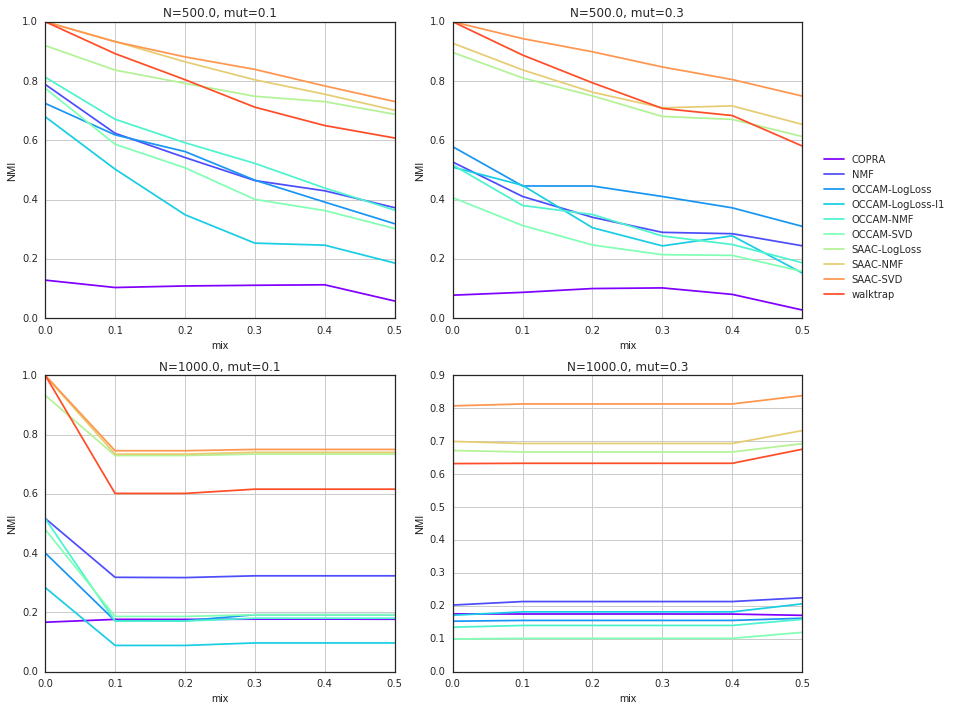

In [34]:
draw_exp_results(model_data_result, x_group='N', y_group='mut', x_name='mix', y_label='NMI')